# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of the protein inhibitors in study.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [4]:
data_path = '/content/bioactivity_data_3class_pIC50_pubchem_fp.csv'
df = pd.read_csv(data_path)

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(4291, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4291, 138)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [25:20<00:29, 29.32s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 138
[LightGBM] [Info] Start training from score 7.805521


100%|██████████| 42/42 [25:21<00:00, 36.22s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [26:12<00:29, 29.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 138
[LightGBM] [Info] Start training from score 7.805521


100%|██████████| 42/42 [26:13<00:00, 37.46s/it]


In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.73,0.74,0.60,0.14
ExtraTreeRegressor,0.73,0.74,0.60,0.16
ExtraTreesRegressor,0.73,0.74,0.60,5.97
GaussianProcessRegressor,0.73,0.74,0.60,5.35
XGBRegressor,0.70,0.71,0.64,1.98
RandomForestRegressor,0.69,0.70,0.65,4.92
BaggingRegressor,0.67,0.68,0.67,0.46
MLPRegressor,0.66,0.68,0.68,5.60
HistGradientBoostingRegressor,0.56,0.57,0.78,1.21


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.24,0.36,0.92,1.46
LGBMRegressor,0.21,0.34,0.94,0.32
NuSVR,0.19,0.32,0.96,1.36
RandomForestRegressor,0.18,0.32,0.96,3.84
SVR,0.16,0.30,0.97,1.64
GradientBoostingRegressor,0.16,0.30,0.97,2.26
BaggingRegressor,0.14,0.28,0.99,0.44
XGBRegressor,0.13,0.27,0.99,1.93
KNeighborsRegressor,0.11,0.26,1.00,0.14


## **5. Data visualization of model performance**

[(0.0, 1.0)]

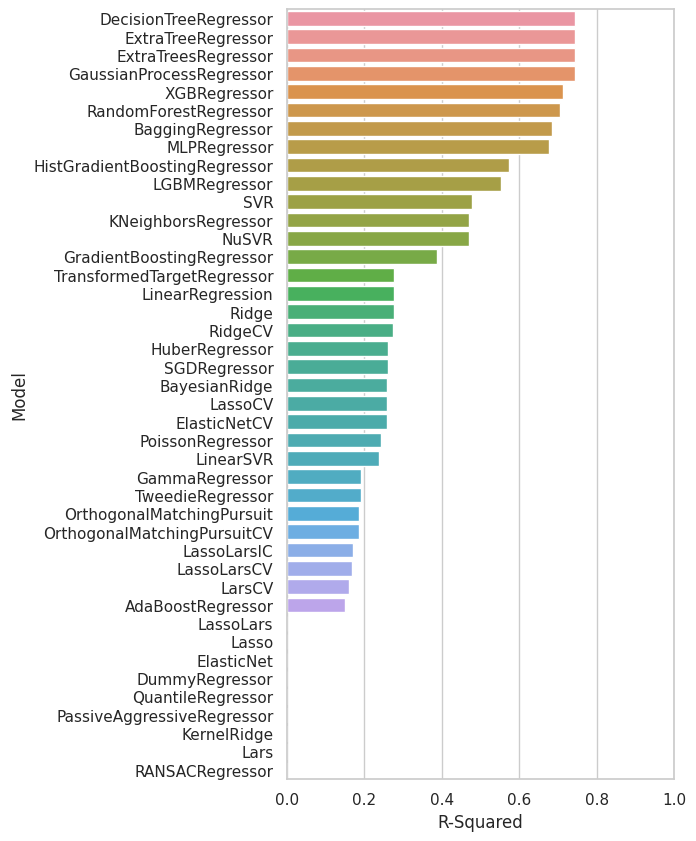

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

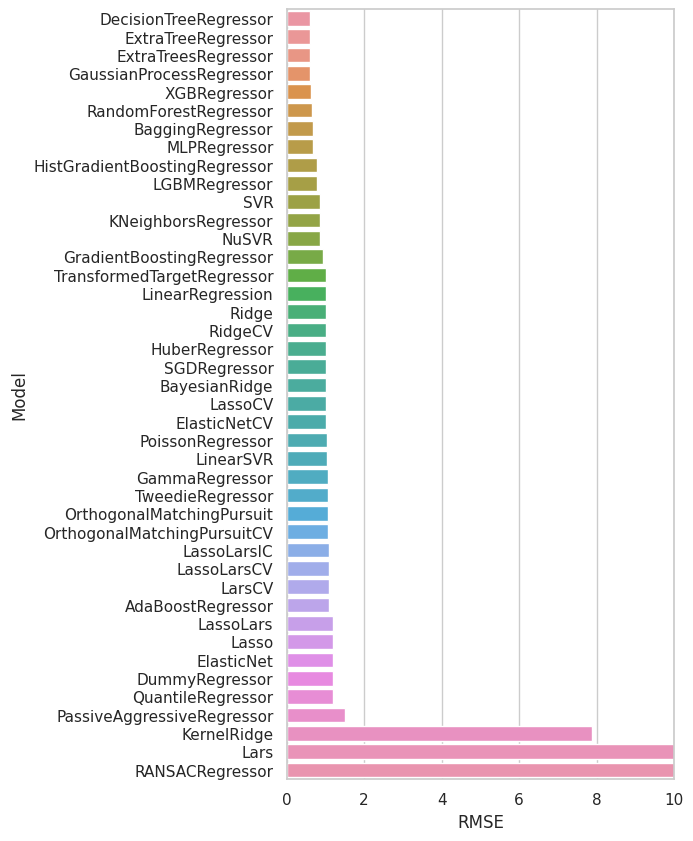

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

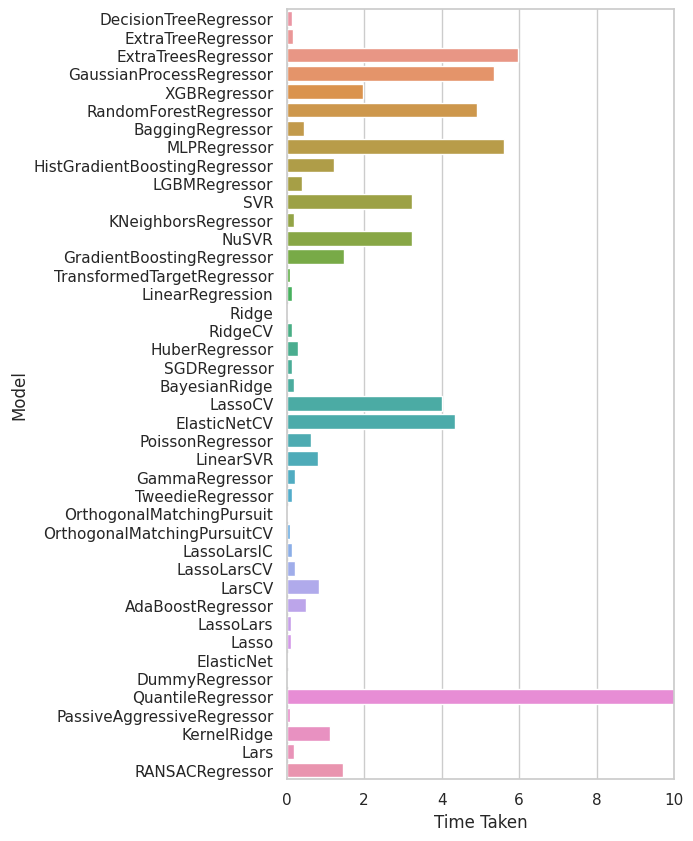

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))